In [482]:
import pandas as pd
import glob
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from matplotlib.patches import Patch
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")


In [2]:
kcutoffs = pd.read_csv('ko_list', sep='\t', index_col=0)
llist = ['Teuk', 'Geuk', 'Tbact', 'Gbact']

ev_dict = {}
for ev in glob.glob('downloads/K00011/*/environmental_parameters.csv'):
    dd = pd.read_csv(ev, sep='\t', index_col='sample_ID')
    ev_dict[ev] = dd
env_params = pd.concat(ev_dict).reset_index().drop('level_0', axis=1).set_index('sample_ID')
env_params = env_params.drop_duplicates(keep='first')

In [44]:
aln_dict = {}
full_dict = {}
ndict  = {}
for lk in glob.glob('downloads/K*'):
    fdict = {}
    ndict = {} 
    k = os.path.basename(lk)
    cutoff = float(kcutoffs.loc[k, 'threshold'])
    for t in llist:
        f = os.path.join(lk, t, '_'.join([k, t, 'aln_result.tsv']))
        if os.stat(f).st_size == 0:
            ndict[t] = pd.DataFrame()
            pass
        else:
            df = pd.read_csv(f, skiprows=8, sep = '\t', index_col=1)
            if 'euk' in t:
                df.index = df.index.str.split("_").str[0:2].str.join('_')    
            passing_genes = df[df.bit_score>cutoff]
            ndict[t] = passing_genes.index
            fdict[t] = df.index
    aln_dict[k] = ndict
    full_dict[k] = fdict

In [35]:
ndict = {}
abund_dict = {}
for lk in glob.glob('downloads/K*'):
    ndict = {}
    k = os.path.basename(lk)
    for t in llist:
        f = os.path.join(lk, t, 'abundance_matrix.csv')

        if os.stat(f).st_size == 0:
            ndict[t]=pd.DataFrame()
            pass
        else:
            df = pd.read_csv(f, sep ='\t', header = 0, skiprows=1, index_col=0)
            ndict[t]=df
    abund_dict[k] = ndict

In [36]:
abund_dict

{'K00130': {'Teuk':                                                             taxonomy  \
  Gene_ID                                                                
  MATOU-v1_66906298  root; cellular organisms; Eukaryota; Stramenop...   
  MATOU-v1_48238627  root; cellular organisms; Bacteria; Actinobact...   
  MATOU-v1_43654689  root; cellular organisms; Eukaryota; Viridipla...   
  MATOU-v1_79081473  root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_68235685  root; cellular organisms; Eukaryota; Opisthoko...   
  ...                                                              ...   
  MATOU-v1_6171844   root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_68199218                           root; cellular organisms   
  MATOU-v1_62951603                                                      
  MATOU-v1_26249576  root; cellular organisms; Bacteria; Actinobact...   
  MATOU-v1_74146445  root; cellular organisms; Eukaryota; Opisthoko...   
  
                 

In [45]:
subset_abund = {}
for lk in glob.glob('downloads/K*'):
    k = os.path.basename(lk)
    ndict = {}
    print(k)
    for t in llist:
        subset = set(abund_dict[k][t].index).intersection(aln_dict[k][t])
        aa = abund_dict[k][t].loc[subset]
        ndict[t]=aa
    subset_abund[k]=ndict

K00130
K17742
K10227
K00008
K00315
K08261
K17755
K00305
K00544
K00011
K19270
K05847
K06720
K00499
K10229
K00314
K00304
K05845
K02798
K02000
K02001
K02002
K14085
K10111
K18897
K00007
K02783
K24204
K00303
K00309
K10674
K15783
K07406
K00009
K19633
K24071
K10228
K02782
K18896
K10112
K11440
K05846
K00045
K00594
K00302
K01189
K02781
K07407
K02800
K00306
K13042
K00108
K00301


In [47]:
subset_abund['K00130']['Teuk']

taxonomy  \
Gene_ID                                                                 
MATOU-v1_35968538   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_64292559   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_29796060                 root; cellular organisms; Eukaryota   
MATOU-v1_64309178   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_8644329    root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_8491105    root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_40565832   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_71444678   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_41382382   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_100108526  root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_114244873  root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_51234846   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_8499937    root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_64339812   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_43654689   root; cellular organisms; Eukaryota; Viridipla...   
MATOU-v1_68235685   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_29794805   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_33140109   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_59975556                 root; cellular organisms; Eukaryota   
MATOU-v1_38460270   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_7566610    root; cellular organisms; Eukaryota; Viridipla...   
MATOU-v1_116461254  root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_5030700    root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_72833679   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_58943042   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_29632414   root; cellular organisms; Bacteria; Proteobact...   
MATOU-v1_48230190   root; cellular organisms; Eukaryota; Stramenop...   
MATOU-v1_93443931                 root; cellular organisms; Eukaryota   
MATOU-v1_15968985                  root; cellular organisms; Bacteria   
MATOU-v1_41211649   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_38451669   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_60472168   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_71413966   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_64645379   root; cellular organisms; Bacteria; Proteobact...   
MATOU-v1_59495111                 root; cellular organisms; Eukaryota   
MATOU-v1_54472916   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_79081473   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_64339813   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_66906298   root; cellular organisms; Eukaryota; Stramenop...   
MATOU-v1_50272764   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_29632415   root; cellular organisms; Bacteria; Proteobact...   
MATOU-v1_58419274   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_29675689                 root; cellular organisms; Eukaryota   
MATOU-v1_51234845   root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_48238627   root; cellular organisms; Bacteria; Actinobact...   
MATOU-v1_114359486  root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_2538462    root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_29732423                 root; cellular organisms; Eukaryota   
MATOU-v1_48231819   root; cellular organisms; Bacteria; Proteobact...   
MATOU-v1_29631868                 root; cellular organisms; Eukaryota   
MATOU-v1_97473324                 root; cellular organisms; Eukaryota   
MATOU-v1_109086411  root; cellular organisms; Eukaryota; Opisthoko...   
MATOU-v1_114269555  root; cellular organisms; Eukaryota; Opisthokonta   
MATOU-v1_38451668   root; cellular organisms; 

In [48]:
total_counts = pd.DataFrame(index = full_dict.keys(), columns = ['MATOU', 'OM-RGC'] )
for key in full_dict:
    for t in full_dict[key]:
        if 'euk' in t:
            euk = len(full_dict[key][t])
        else:
            bact = len(full_dict[key][t])
    total_counts.loc[key, 'MATOU']=euk
    total_counts.loc[key, 'OM-RGC']=bact

In [527]:
total_counts.loc['K13042']

MATOU     1675
OM-RGC     799
Name: K13042, dtype: object

In [59]:
K = 'K02002'

def count_taxa(K, dtype='Tbact'):
    df = subset_abund[K][dtype]
    if 'taxonomy' in df.columns:
        t = df.groupby('taxonomy').count().iloc[:,0].sort_values(ascending=False)
        t=pd.DataFrame(t)
        t.columns = ['count']
    else:
        t=None
    return(t)
# taxa = df.taxonomy.str.split(';', expand = True)
# df.merge(taxa, left_index=True, right_index=True)

In [60]:
subset_abund_taxa_gbact = {}
for k in subset_abund.keys():
    subset_abund_taxa_gbact[k] = count_taxa(k, )

In [61]:
subset_abund_taxa_teuk = {}
for k in subset_abund.keys():
    subset_abund_taxa_teuk[k] = count_taxa(k, dtype='Teuk')

In [279]:
subset_abund

{'K00130': {'Teuk':                                                              taxonomy  \
  Gene_ID                                                                 
  MATOU-v1_35968538   root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_64292559   root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_29796060                 root; cellular organisms; Eukaryota   
  MATOU-v1_64309178   root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_8644329    root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_8491105    root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_40565832   root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_71444678   root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_41382382   root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_100108526  root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU-v1_114244873  root; cellular organisms; Eukaryota; Opisthoko...   
  MATOU

Duplicate key in file PosixPath('/vortexfs1/home/halexander/.conda/envs/general_plotting/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.sans-serif: Arial')


In [64]:

subset_abund['K02001']['Tbact'].drop('taxonomy', axis=1).sum().sort_values()

TARA_B100000444    0.000015
TARA_B100000959    0.000017
TARA_B100001107    0.000017
TARA_B100001010    0.000018
TARA_B100000133    0.000018
                     ...   
TARA_B110001437    0.000155
TARA_B110000966    0.000169
TARA_B110001435    0.000169
TARA_B110000085    0.000196
TARA_B100000120    0.000469
Length: 187, dtype: float64

In [65]:
df = pd.read_csv('../input/Osmolyte-Reactions.tsv', sep='\t')
df.ORTHOLOGY = df.ORTHOLOGY.str.split(';')
df = df[df['ORTHOLOGY'].notna()]
df['COMBINED_ORTHO'] = df[['NAMED_GROUP', 'PATHWAY']].astype(str).agg(':'.join, axis=1)
df['COMBINED_ORTHO_STEP'] = df[['NAMED_GROUP', 'PATHWAY', 'STEP']].astype(str).agg(':'.join, axis=1)
df['max_step']= df.groupby('COMBINED_ORTHO')['STEP'].transform('max')
df['ALLKO']=df.groupby('COMBINED_ORTHO_STEP')['ORTHOLOGY'].transform(sum)

#Subset the DF to just columns that we will be using
subset_df = df[['COMPOUND_NAME','COMPOUND','BROAD', 'NAMED_GROUP', 'COMBINED_ORTHO','COMBINED_ORTHO_STEP', 'ALLKO', 'max_step']]
subset_df = subset_df.loc[subset_df[['COMPOUND_NAME','COMPOUND','BROAD', 'NAMED_GROUP', 'COMBINED_ORTHO','COMBINED_ORTHO_STEP']].drop_duplicates().index]

metabolite_dict = pd.read_csv('../input/types.csv')[['metabolite', 'gentype']].set_index('metabolite').to_dict()['gentype']
#Index by KOs in an explosive fashion
ko_indexed = subset_df.explode('ALLKO').set_index('ALLKO')
ko_indexed['TYPE'] = ko_indexed.COMPOUND_NAME.map(metabolite_dict)

In [66]:
ko_indexed

COMPOUND_NAME COMPOUND      BROAD  \
ALLKO                                        
K00864        Glycerol   C00116  BREAKDOWN   
K00863        Glycerol   C00116  BREAKDOWN   
K05878        Glycerol   C00116  BREAKDOWN   
K05879        Glycerol   C00116  BREAKDOWN   
K05881        Glycerol   C00116  BREAKDOWN   
...                ...      ...        ...   
K10674         Ectoine   C06231  BREAKDOWN   
K15783         Ectoine   C06231  BREAKDOWN   
K15784         Ectoine   C06231  BREAKDOWN   
K15785         Ectoine   C06231  BREAKDOWN   
K10674  Hydroxyectoine   C16432  SYNTHESIS   

                                          NAMED_GROUP  \
ALLKO                                                   
K00864  Glycerol breakdown to sn-Glycerol 3-phosphate   
K00863         Glycerol breakdown Glycerone phosphate   
K05878         Glycerol breakdown Glycerone phosphate   
K05879         Glycerol breakdown Glycerone phosphate   
K05881         Glycerol breakdown Glycerone phosphate   
...                                               ...   
K10674     Ectoine transformation to 5-Hydroxyectoine   
K15783                              Ectoine recycling   
K15784                              Ectoine recycling   
K15785                              Ectoine recycling   
K10674                         Synthesis from Ectoine   

                                         COMBINED_ORTHO  \
ALLKO                                                     
K00864  Glycerol breakdown to sn-Glycerol 3-phosphate:1   
K00863         Glycerol breakdown Glycerone phosphate:1   
K05878         Glycerol breakdown Glycerone phosphate:1   
K05879         Glycerol breakdown Glycerone phosphate:1   
K05881         Glycerol breakdown Glycerone phosphate:1   
...                                                 ...   
K10674     Ectoine transformation to 5-Hydroxyectoine:1   
K15783                              Ectoine recycling:1   
K15784                              Ectoine recycling:1   
K15785                              Ectoine recycling:1   
K10674                         Synthesis from Ectoine:1   

                                      COMBINED_ORTHO_STEP  max_step  \
ALLKO                                                                 
K00864  Glycerol breakdown to sn-Glycerol 3-phosphate:1:1         1   
K00863         Glycerol breakdown Glycerone phosphate:1:2         2   
K05878         Glycerol breakdown Glycerone phosphate:1:2         2   
K05879         Glycerol breakdown Glycerone phosphate:1:2         2   
K05881         Glycerol breakdown Glycerone phosphate:1:2         2   
...                                                   ...       ...   
K10674     Ectoine transformation to 5-Hydroxyectoine:1:1         1   
K15783                              Ectoine recycling:1:1         3   
K15784                              Ectoine recycling:1:2         3   
K15785                              Ectoine recycling:1:3         3   
K10674                         Synthesis from Ectoine:1:1         1   

                 TYPE  
ALLKO                  
K00864  Sugar alcohol  
K00863  Sugar alcohol  
K05878  Sugar alcohol  
K05879  Sugar alcohol  
K05881  Sugar alcohol  
...               ...  
K10674     Amino acid  
K15783     Amino acid  
K15784     Amino acid  
K15785     Amino acid  
K10674     Amino acid  

[843 rows x 8 columns]

In [71]:
def get_all_genes_summed(dtype='Tbact'):
    dict_k = {}
    for k in subset_abund.keys():
        if 'taxonomy' in subset_abund[k][dtype]:
            kdf = pd.DataFrame(subset_abund[k][dtype].drop('taxonomy', axis=1).sum().sort_values())
            kdf.columns = [k]
            dict_k[k] = kdf
    bigd = pd.concat(dict_k, axis = 1)
    bigd.columns = bigd.columns.get_level_values(0)
    return(bigd)

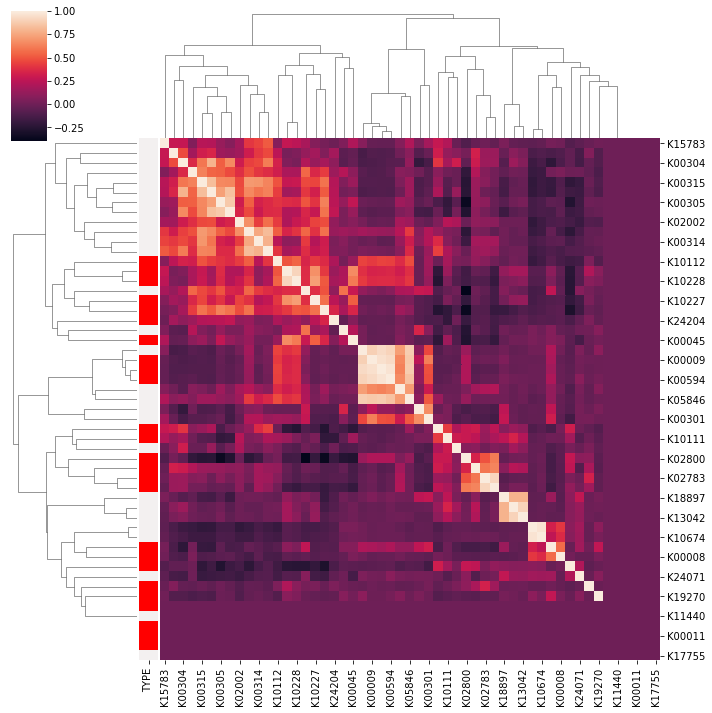

In [72]:
Tbact_summed = get_all_genes_summed()

def corr_data(Tbact_summed):
    Tbact_summed_corr = Tbact_summed.corr('pearson')
    type_mol = pd.DataFrame(ko_indexed.loc[Tbact_summed.corr().index].TYPE).reset_index().drop_duplicates().sort_values('ALLKO').replace('Sugar', 'Sugar alcohol').drop_duplicates().set_index('ALLKO')
    type_col = type_mol.to_dict()['TYPE']
    Tbact_summed_corr['TYPE'] = Tbact_summed_corr.index.map(type_col)
    network_pal = sns.light_palette('red', len(Tbact_summed_corr.TYPE.unique()))
    network_lut = dict(zip(Tbact_summed_corr.TYPE.unique(), network_pal))
    network_colors = pd.Series(Tbact_summed_corr.TYPE).map(network_lut)
    # Teuk_summed = get_all_genes_summed(dtype='Teuk')
    sns.clustermap(Tbact_summed_corr.fillna(0)[Tbact_summed_corr.index], row_colors=network_colors)
    return(Tbact_summed_corr)

Tbact_summed_corr = corr_data(Tbact_summed)

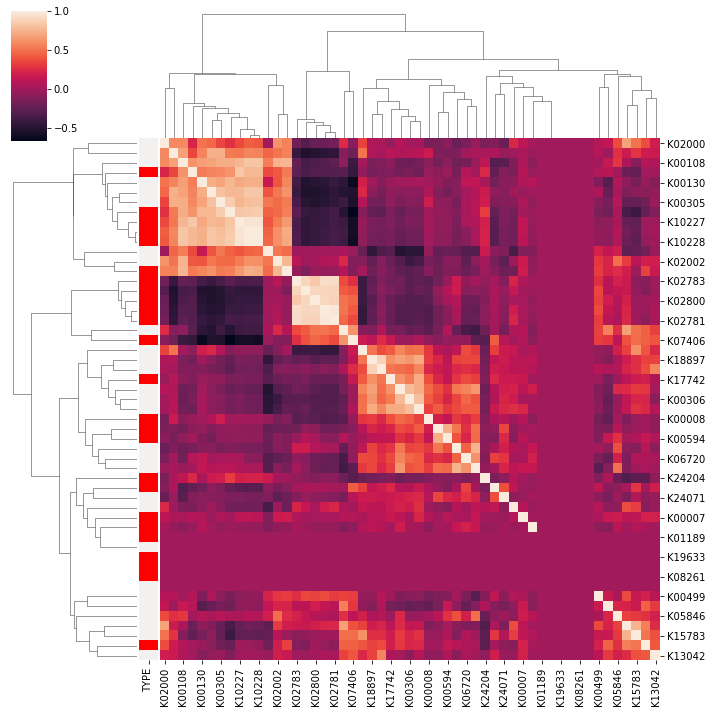

In [73]:

Gbact_summed = get_all_genes_summed(dtype='Gbact')

Gbact_summed_corr = corr_data(Gbact_summed)

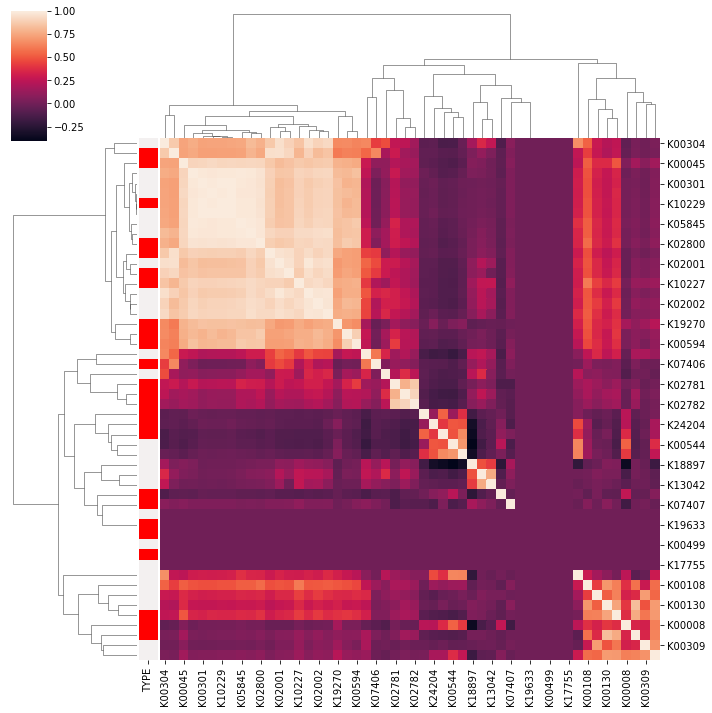

In [74]:
Teuk_summed = get_all_genes_summed(dtype='Teuk')

Teuk_summed_corr = corr_data(Teuk_summed)

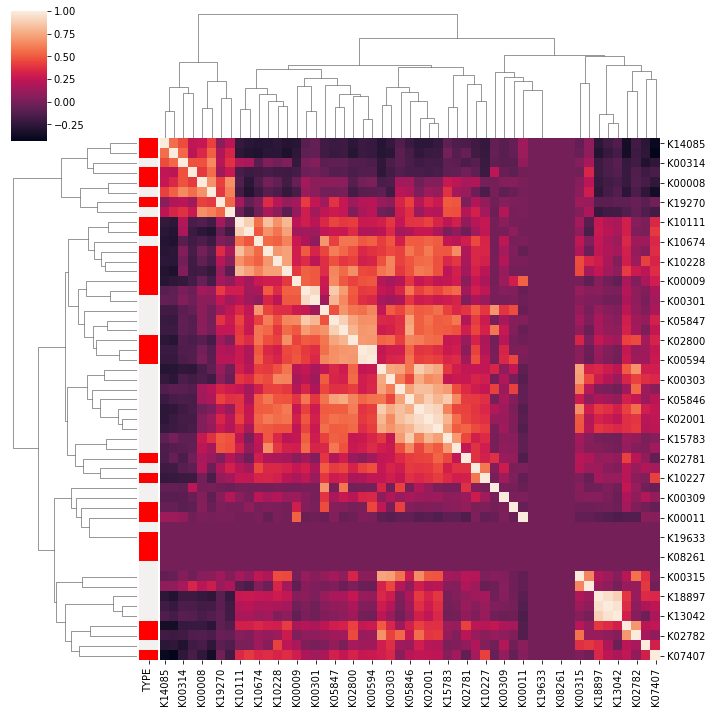

In [75]:
Geuk_summed = get_all_genes_summed(dtype='Geuk')

Geuk_summed_corr = corr_data(Geuk_summed)

In [76]:
pd.DataFrame(ko_indexed.loc[Tbact_summed.corr().index].BROAD).reset_index().drop_duplicates().sort_values('ALLKO')

ALLKO      BROAD
62  K00007  BREAKDOWN
60  K00007  SYNTHESIS
7   K00008  SYNTHESIS
8   K00008  BREAKDOWN
80  K00009  BREAKDOWN
..     ...        ...
81  K19633  SYNTHESIS
82  K24071  SYNTHESIS
83  K24071  BREAKDOWN
65  K24204  BREAKDOWN
64  K24204  SYNTHESIS

[70 rows x 2 columns]

In [77]:
def compare_scatter(k1, k2, dtype='Tbact'):
    a = pd.DataFrame(subset_abund[k1][dtype].drop('taxonomy', axis=1).sum().sort_values())
    a.columns = [k1]
    b =  pd.DataFrame(subset_abund[k2][dtype].drop('taxonomy', axis=1).sum().sort_values())
    b.columns = [k2]
    c = a.merge(b, left_index=True, right_index=True).plot(kind='scatter', x=k1, y=k2)
    return(c)


<AxesSubplot:xlabel='K02001', ylabel='K02002'>

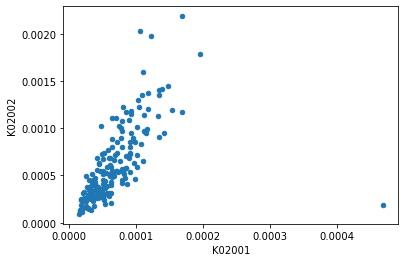

In [78]:
compare_scatter('K02001', 'K02002')

<AxesSubplot:xlabel='K02001', ylabel='K02000'>

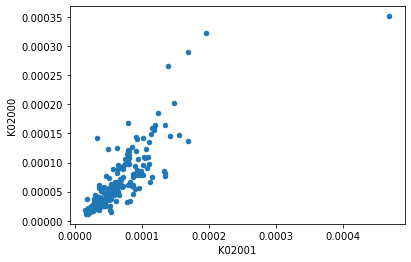

In [331]:
compare_scatter('K02001', 'K02000')

<AxesSubplot:xlabel='K02001', ylabel='K10229'>

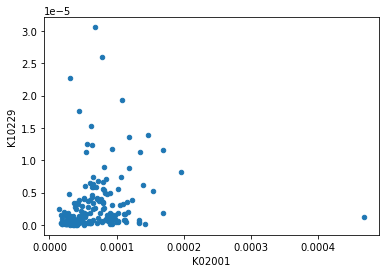

In [332]:
compare_scatter('K02001', 'K10229')

In [79]:
Tbact_summed_env = Tbact_summed.merge(env_params, left_index=True, right_index=True, how='left')
Tbact_summed_env = Tbact_summed_env[~Tbact_summed_env.index.duplicated(keep='first')]
list(Tbact_summed_env.columns)

['K00130',
 'K17742',
 'K10227',
 'K00008',
 'K00315',
 'K08261',
 'K17755',
 'K00305',
 'K00544',
 'K00011',
 'K19270',
 'K05847',
 'K06720',
 'K00499',
 'K10229',
 'K00314',
 'K00304',
 'K05845',
 'K02798',
 'K02000',
 'K02001',
 'K02002',
 'K14085',
 'K10111',
 'K18897',
 'K00007',
 'K02783',
 'K24204',
 'K00303',
 'K00309',
 'K10674',
 'K15783',
 'K07406',
 'K00009',
 'K19633',
 'K24071',
 'K10228',
 'K02782',
 'K18896',
 'K10112',
 'K11440',
 'K05846',
 'K00045',
 'K00594',
 'K00302',
 'K01189',
 'K02781',
 'K07407',
 'K02800',
 'K00306',
 'K13042',
 'K00108',
 'K00301',
 'OGA_ID',
 'station',
 'depth',
 'size fraction',
 'latitude',
 'longitude',
 'OGA_ID.1',
 'Station',
 'ENA_ID',
 'INSDC_ID',
 'BioSamples_ID',
 'Sample_method',
 'Depth_Nominal',
 'Environmental_feature',
 'Fraction_Lower (µm)',
 'Fraction_Upper (µm)',
 'Biome',
 'Region',
 'Province',
 'Barcode',
 'Date_Time',
 'Seafloor (m)',
 'Temperature (°C)',
 'Salinity (PSU)',
 'Density (kg/m**3)',
 'Distance_coast (km)',

K00130        K17742    K10227        K00008  K08261  \
TARA_A100000165  0.000012  0.000000e+00  0.000029  0.000000e+00     0.0   
TARA_A100000220  0.000003  0.000000e+00  0.000100  0.000000e+00     0.0   
TARA_A100001026  0.000004  4.271605e-07  0.000040  2.361691e-06     0.0   
TARA_A100001195  0.000002  0.000000e+00  0.000017  0.000000e+00     0.0   
TARA_A100001401  0.000002  0.000000e+00  0.000027  1.558209e-07     0.0   
...                   ...           ...       ...           ...     ...   
TARA_B110000975  0.000006  0.000000e+00  0.000058  3.516356e-08     0.0   
TARA_B110001435  0.000024  0.000000e+00  0.000334  0.000000e+00     0.0   
TARA_B110001444  0.000010  0.000000e+00  0.000088  0.000000e+00     0.0   
TARA_B110001467  0.000012  0.000000e+00  0.000137  0.000000e+00     0.0   
TARA_X100000009  0.000015  0.000000e+00  0.000446  0.000000e+00     0.0   

                 K17755    K00544  K00011  K19270        K05847  ...  \
TARA_A100000165     0.0  0.000016     0.0     0.0  9.245461e-07  ...   
TARA_A100000220     0.0  0.000079     0.0     0.0  3.217718e-06  ...   
TARA_A100001026     0.0  0.000011     0.0     0.0  2.945959e-06  ...   
TARA_A100001195     0.0  0.000007     0.0     0.0  1.691999e-06  ...   
TARA_A100001401     0.0  0.000012     0.0     0.0  1.783539e-06  ...   
...                 ...       ...     ...     ...           ...  ...   
TARA_B110000975     0.0  0.000013     0.0     0.0  4.966721e-06  ...   
TARA_B110001435     0.0  0.000028     0.0     0.0  5.975517e-06  ...   
TARA_B110001444     0.0  0.000023     0.0     0.0  3.882984e-06  ...   
TARA_B110001467     0.0  0.000002     0.0     0.0  4.667832e-07  ...   
TARA_X100000009     0.0  0.000052     0.0     0.0  3.690136e-06  ...   

                 Zeaxanthin (mg/m**3)  Lutein (mg/m**3)  Latitude (-)  \
TARA_A100000165               0.05410            0.0000       35.7590   
TARA_A100000220                   NaN               NaN       34.2116   
TARA_A100001026               0.10320            0.0000       23.3600   
TARA_A100001195               0.20015            0.0000       21.9467   
TARA_A100001401               0.13445            0.0000       27.1600   
...                               ...               ...           ...   
TARA_B110000975               0.00380            0.0006       71.0704   
TARA_B110001435               0.00850            0.0007       54.5305   
TARA_B110001444               0.00295            0.0000       67.1410   
TARA_B110001467                   NaN               NaN       76.1825   
TARA_X100000009                   NaN               NaN       41.6686   

                 Longitude (-)  Sea_ice* (%)   Season  Season_subperiod  \
TARA_A100000165        14.2574           0.0   autumn            middle   
TARA_A100000220        13.7684           0.0   autumn            middle   
TARA_A100001026        37.2183           0.0   winter             early   
TARA_A100001195        38.2517           0.0   winter             early   
TARA_A100001401        34.8350           0.0   winter             early   
...                        ...           ...      ...               ...   
TARA_B110000975       174.9916           0.0   summer              late   
TARA_B110001435       -16.9377           0.0   spring             early   
TARA_B110001444         0.2355           0.0   spring              late   
TARA_B110001467         1.3918           0.0   spring              late   
TARA_X100000009         2.7996           0.0  unknown           unknown   

                 Okubo-Weiss* (-)  Lyapunov* (l/day)  Residence_time* (days)  
TARA_A100000165         -0.124391           0.066158               15.222222  
TARA_A100000220          0.007018           0.078478                1.777778  
TARA_A100001026         -0.014886                NaN                0.000000  
TARA_A100001195          0.450777           0.000000                0.000000  
TARA_A100001401          0.162621           0.028165                1.194444  
.

In [80]:
compound_dict = {}
for g, n in ko_indexed.loc[Tbact_summed.columns].groupby('COMPOUND_NAME'):
    compound_dict[g]= sorted(list(set(n.index)))
    
def Kplot_maps_overlay(Tbact_summed_env, K='K00130', scale = 10e5):
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
        
    for depth, color in zip(['SRF', 'DCM', 'MES'], ['green', 'blue', 'red']):
        subset = Tbact_summed_env[Tbact_summed_env['depth']==depth]
        ax.scatter(x =subset.longitude, y=subset.latitude, 
               s= subset[K]*scale, transform=ccrs.PlateCarree(), alpha=0.5,color=color)
    plt.show()
    
def Kplot_maps_subplot(Tbact_summed_env, Klist=['K00130'], kname='test', scale = 10e5, color='blue', depth_list = ['SRF', 'DCM', 'MES']):
    fig = plt.figure(figsize=(12, 12))
    gs = fig.add_gridspec(len(Klist), 3)
    for i, k in enumerate(Klist):
        for j,d in enumerate(depth_list):
            subset = Tbact_summed_env[Tbact_summed_env['depth']==d]
            ax = fig.add_subplot(gs[i, j], projection=ccrs.PlateCarree())
            ax.coastlines()
            ax.scatter(x =subset.longitude, y=subset.latitude, 
               s= subset[k]*scale, transform=ccrs.PlateCarree(), alpha=0.8,color=color)
            ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
            if j == 0:
                ax.text(-350,1, k, fontsize=14)

            if i ==0:
                ax.set_title(d)

    plt.savefig(kname+'_Tbact.pdf')
    return()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


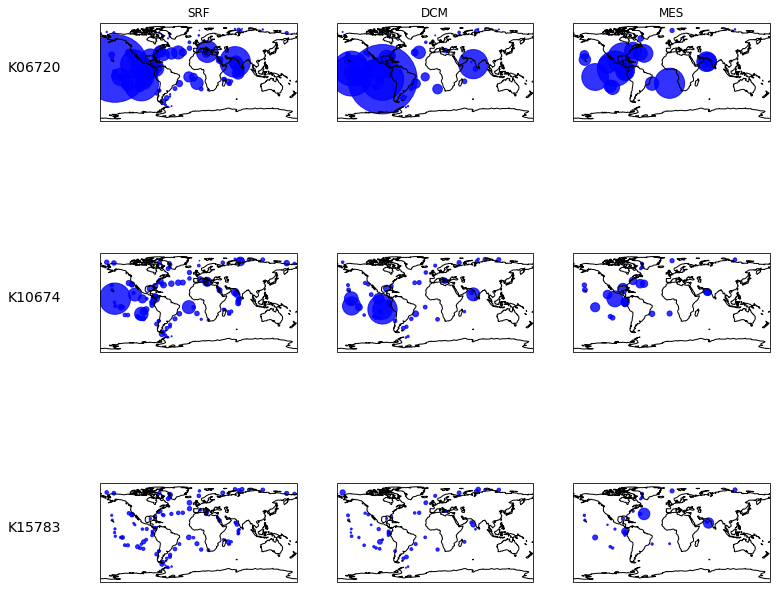

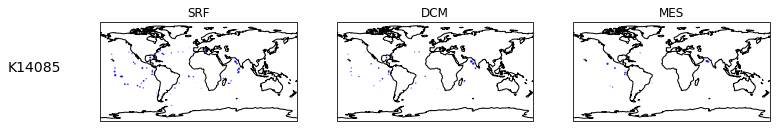

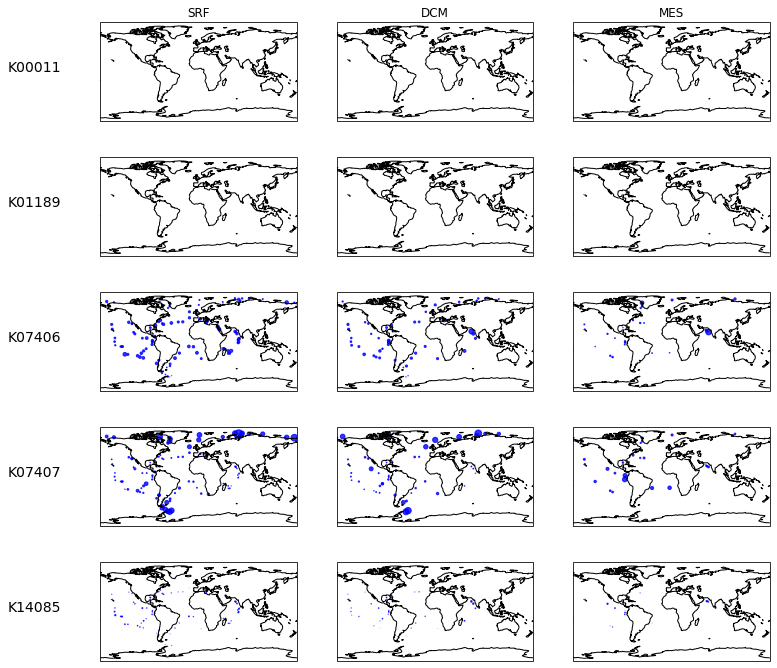

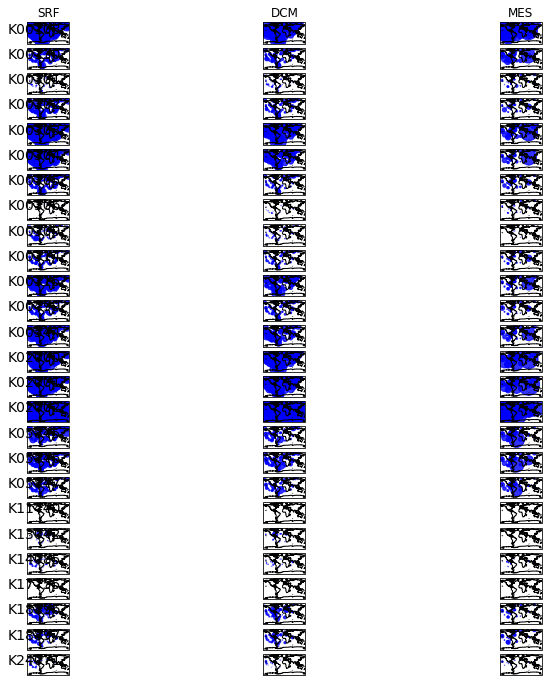

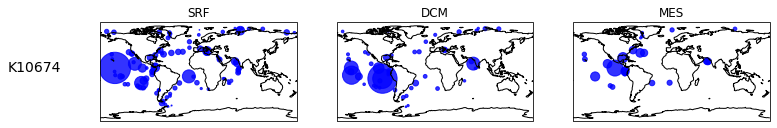

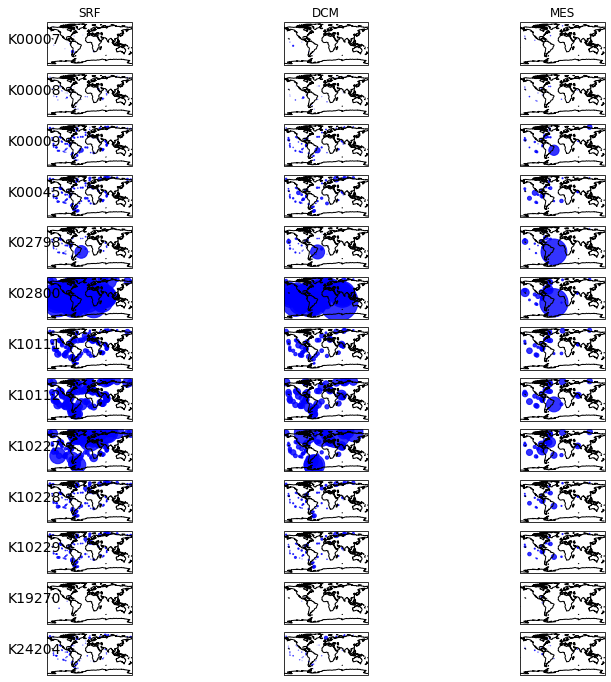

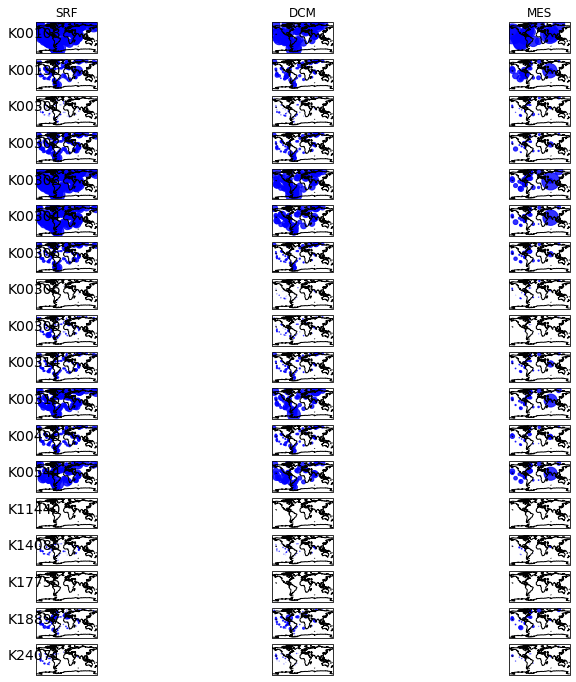

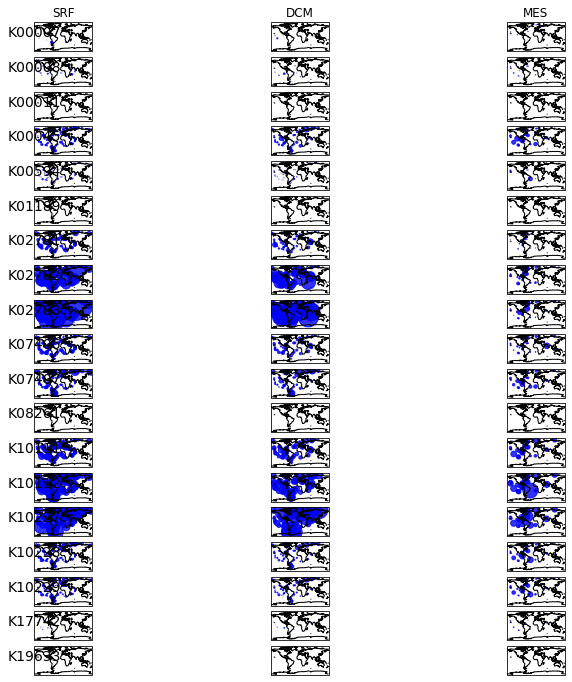

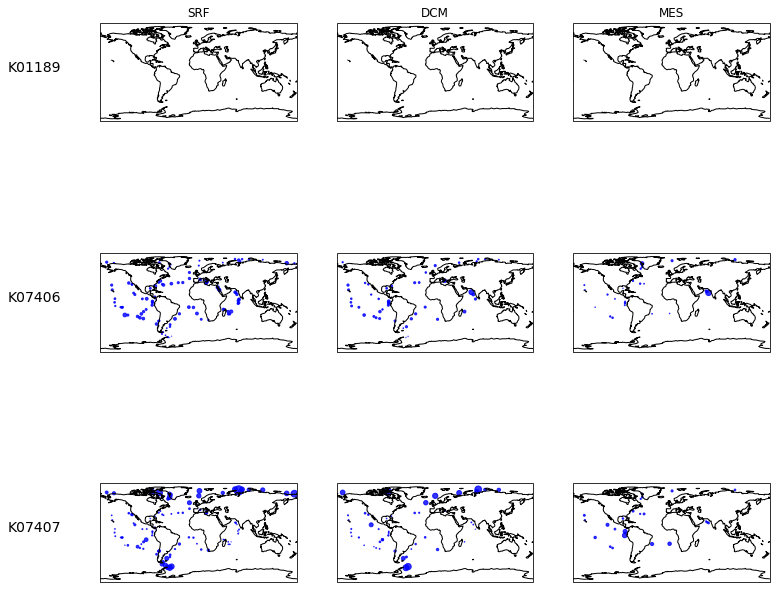

In [81]:
for compound in compound_dict:
    
    Kplot_maps_subplot(Tbact_summed_env, Klist=compound_dict[compound], kname=compound)

()

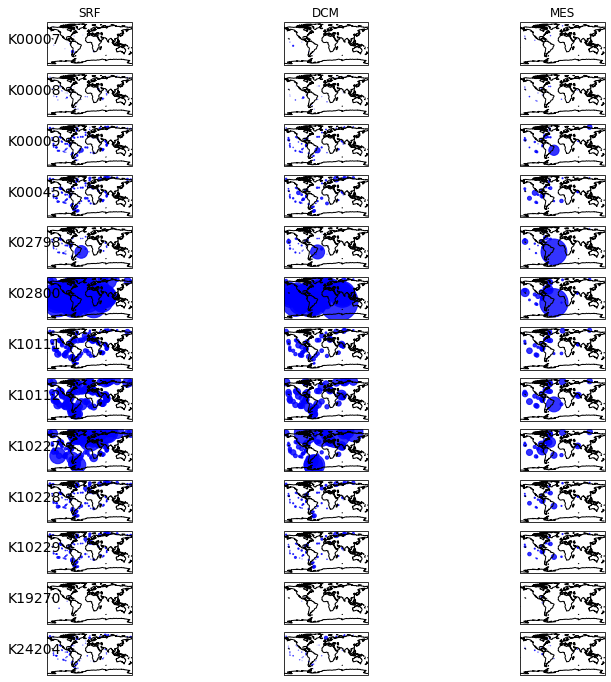

In [82]:
Kplot_maps_subplot(Tbact_summed_env, Klist=compound_dict['Mannitol'] )

In [ ]:
Kplot_maps_subplot(Tbact_summed_env, Klist=compound_dict['Mannitol'] )

In [83]:
for g, n in ko_indexed.loc[Tbact_summed.columns].groupby('COMPOUND_NAME'):
    compound_dict[g]= set(n.index)


In [84]:
bd_groups = {}
for group, df in ko_indexed.groupby(['COMPOUND_NAME', 'BROAD']):
    bd_groups[group]= sorted(list(set(df.index)))
    

In [85]:
GBsets = [('Glycine betaine', 'BREAKDOWN'), ('Glycine betaine', 'SYNTHESIS'), ('Glycine betaine', 'TRANSPORT')]
Msets = [('Mannitol', 'BREAKDOWN'), ('Mannitol', 'SYNTHESIS'), ('Mannitol', 'TRANSPORT'),]

In [531]:
bd_groups[('Glycine betaine', 'BREAKDOWN')]

['K00301',
 'K00302',
 'K00303',
 'K00304',
 'K00305',
 'K00306',
 'K00309',
 'K00314',
 'K00315',
 'K00544']

In [134]:
sns.set(rc={'figure.figsize':(20,10)})

def create_box_plot(Tbact_summed, compound = 'Glycine betaine', colors = ['#6E8A0F','#A1A1A1']):
    Trans = Tbact_summed[bd_groups[(compound, 'TRANSPORT')]]
    Syn = Tbact_summed[Tbact_summed.columns.intersection(bd_groups[(compound, 'SYNTHESIS')])]
    BD = Tbact_summed[Tbact_summed.columns.intersection(bd_groups[(compound, 'BREAKDOWN')])]
    SynBD = Syn.merge(BD, left_index = True, right_index=True, how='inner')
    print(SynBD.columns)
    cdict = {}
    for t, c in zip([Trans, SynBD], colors):
        for k in t.columns:
            cdict[k]=c
    tt = Trans.merge(SynBD, left_index=True, right_index=True)
    g = sns.boxplot(data = tt,palette=cdict)
    g.set_yscale('log')
    return(tt, cdict)

Index(['K00130', 'K17755', 'K00499', 'K14085', 'K18897', 'K24071', 'K18896',
       'K11440', 'K13042', 'K00108', 'K00315', 'K00305', 'K00544', 'K00314',
       'K00304', 'K00303', 'K00309', 'K00302', 'K00306', 'K00301'],
      dtype='object')


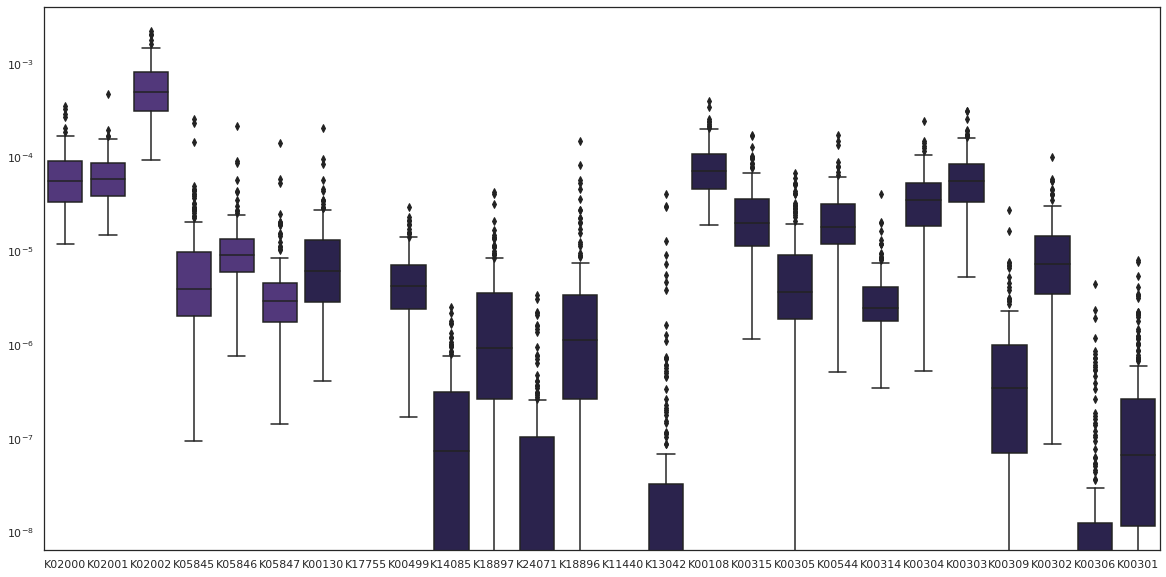

In [476]:
GB_combo, GB_cdict = create_box_plot(Tbact_summed, compound='Glycine betaine', colors  = ['#4F2D86','#271C54'])
plt.savefig('figures/Glycine_betaine_distributions.pdf')

In [92]:
GB_combo.columns

Index(['K02000', 'K02001', 'K02002', 'K05845', 'K05846', 'K05847', 'K00130',
       'K17755', 'K00499', 'K14085', 'K18897', 'K24071', 'K18896', 'K11440',
       'K13042', 'K00108', 'K00315', 'K00305', 'K00544', 'K00314', 'K00304',
       'K00303', 'K00309', 'K00302', 'K00306', 'K00301'],
      dtype='object')

Index(['K00008', 'K19270_x', 'K00007_x', 'K24204_x', 'K00009_x', 'K00045_x',
       'K19270_y', 'K02798', 'K00007_y', 'K24204_y', 'K00009_y', 'K00045_y',
       'K02800'],
      dtype='object')


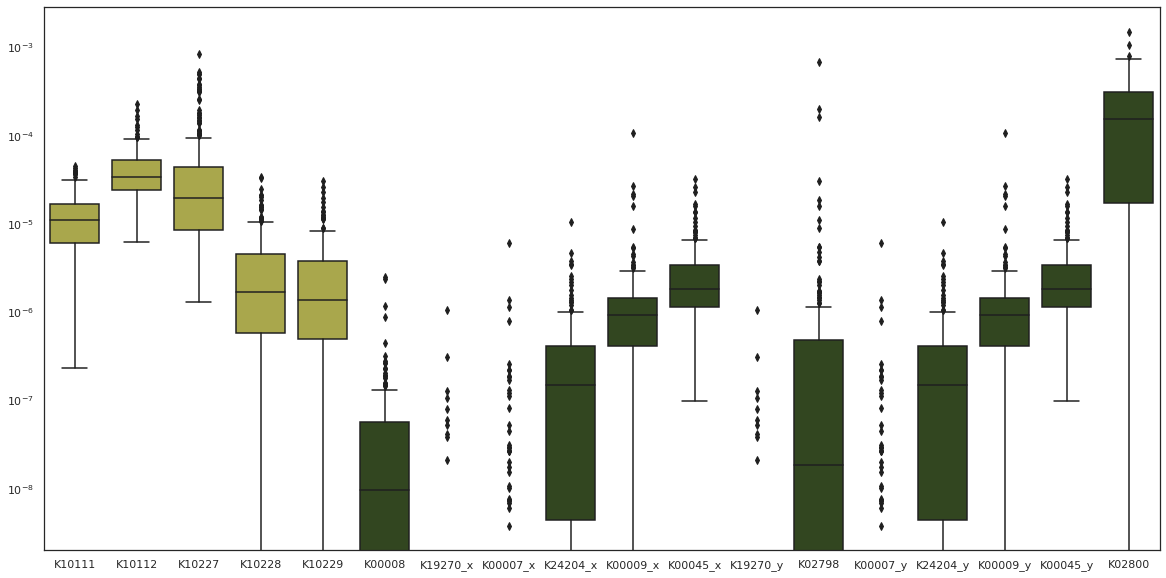

In [477]:
M_combo, M_cdict = create_box_plot(Tbact_summed, compound='Mannitol', colors = ['#B8B63D','#314D19'])
plt.savefig('figures/Manitol_distributions.pdf')

In [274]:
all_cdict={}
for key in M_cdict.keys():
    nk = key.strip('_x').strip('_y') 
    all_cdict[nk] = M_cdict[key]
for key in GB_cdict.keys():
    all_cdict[key]=GB_cdict[key]

In [275]:
for M in  M_combo.columns:
    if M.endswith('_y'):
        
        M_combo = M_combo.drop(M, axis=1)

In [276]:
cols =[ M.strip('_x') for M in M_combo]
M_combo.columns = cols

In [277]:
M_set = set(key.strip('_x').strip('_y') for key in M_cdict.keys())
GB_set = set(GB_cdict.keys())

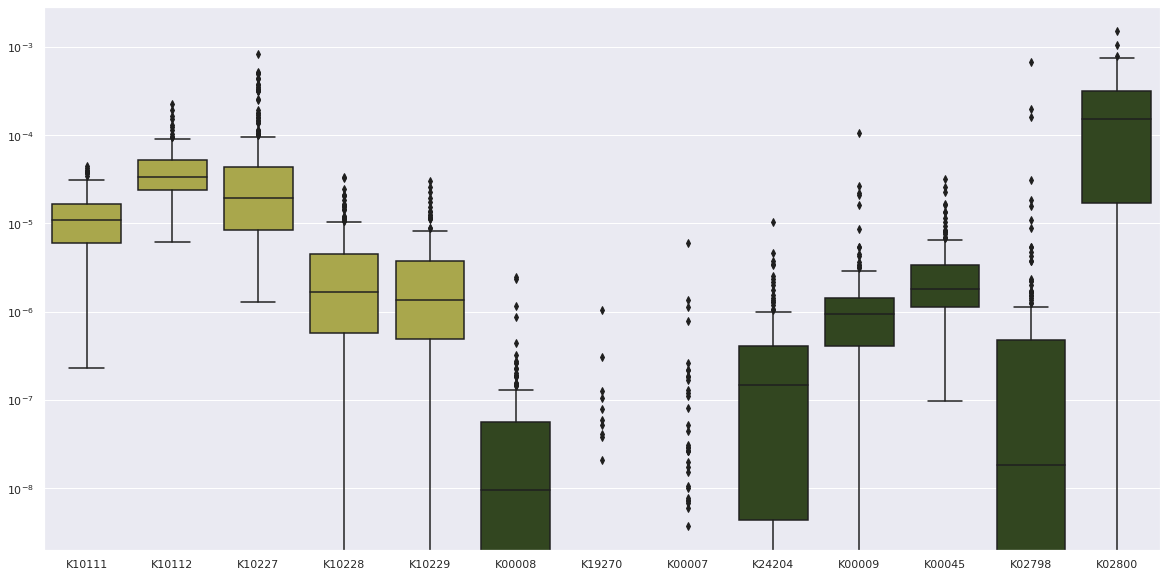

In [278]:
g = sns.boxplot(data = M_combo,palette=all_cdict)
g.set_yscale('log')
plt.savefig('figures/Manitol_distributions.pdf')

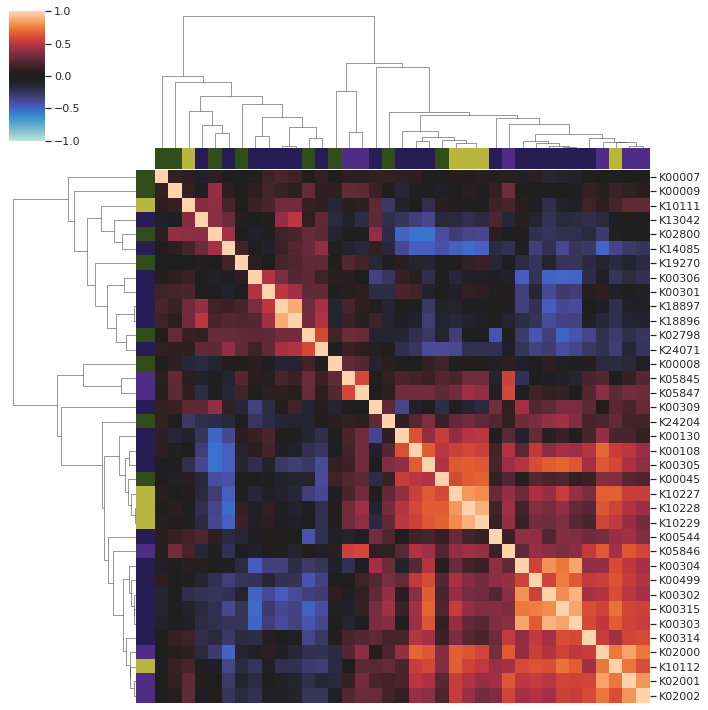

In [222]:
MGB_combo = M_combo.merge(GB_combo, left_index=True, right_index=True)
MGB_combo_corr = MGB_combo.corr('spearman')
MGB_combo_corr = MGB_combo_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')
row_colors = MGB_combo_corr.index.map(all_cdict)
row_colors
g=sns.clustermap(MGB_combo_corr,   col_colors=row_colors,row_colors=row_colors,yticklabels=1, metric='correlation',
                 vmin=-1, vmax=1, cmap=sns.color_palette("icefire", as_cmap=True),
                  xticklabels =0)# linewidths=0.1,
plt.savefig('figures/clustermap.pdf')

K10111    K10112    K10227        K10228        K10229  \
TARA_B100000267  0.000005  0.000020  0.000006  1.595816e-07  9.176593e-08   
TARA_B100000987  0.000013  0.000020  0.000004  3.244205e-07  4.617198e-08   
TARA_B100000900  0.000018  0.000043  0.000009  2.882477e-07  1.668711e-07   
TARA_B100000674  0.000007  0.000019  0.000004  2.236507e-07  2.842303e-07   
TARA_B100000943  0.000011  0.000028  0.000015  3.102395e-06  4.203003e-06   
...                   ...       ...       ...           ...           ...   
TARA_B100000787  0.000002  0.000085  0.000249  5.691210e-06  3.183069e-06   
TARA_B100000954  0.000010  0.000015  0.000003  5.910719e-08  3.853867e-07   
TARA_B100000929  0.000030  0.000032  0.000104  3.245995e-05  2.269195e-05   
TARA_B100000090  0.000016  0.000053  0.000042  4.119991e-07  1.180079e-07   
TARA_B100000316  0.000002  0.000006  0.000001  5.322380e-07  1.132311e-07   

                       K00008        K19270  K00007        K24204  \
TARA_B100000267  1.127407e-07  0.000000e+00     0.0  1.728483e-07   
TARA_B100000987  0.000000e+00  0.000000e+00     0.0  1.836221e-08   
TARA_B100000900  3.080040e-08  0.000000e+00     0.0  5.989055e-07   
TARA_B100000674  3.623084e-08  0.000000e+00     0.0  3.350908e-07   
TARA_B100000943  2.647389e-07  0.000000e+00     0.0  0.000000e+00   
...                       ...           ...     ...           ...   
TARA_B100000787  6.731627e-08  0.000000e+00     0.0  1.790581e-07   
TARA_B100000954  0.000000e+00  0.000000e+00     0.0  0.000000e+00   
TARA_B100000929  9.673444e-09  1.262154e-07     0.0  0.000000e+00   
TARA_B100000090  0.000000e+00  0.000000e+00     0.0  2.283819e-07   
TARA_B100000316  0.000000e+00  0.000000e+00     0.0  0.000000e+00   

                       K00009  ...    K00315        K00305    K00544  \
TARA_B100000267  1.631061e-06  ...  0.000017  2.852051e-06  0.000008   
TARA_B100000987  5.891941e-07  ...  0.000008  4.368821e-07  0.000018   
TARA_B100000900  2.818702e-07  ...  0.000041  2.715145e-06  0.000024   
TARA_B100000674  7.624230e-07  ...  0.000021  2.634285e-06  0.000013   
TARA_B100000943  1.365391e-06  ...  0.000006  9.507407e-07  0.000016   
...                       ...  ...       ...           ...       ...   
TARA_B100000787  8.799301e-08  ...  0.000054  6.007884e-05  0.000013   
TARA_B100000954  8.003469e-07  ...  0.000008  1.594092e-06  0.000011   
TARA_B100000929  2.003910e-07  ...  0.000001  4.211322e-06  0.000001   
TARA_B100000090  8.593316e-07  ...  0.000023  4.454257e-06  0.000049   
TARA_B100000316  0.000000e+00  ...  0.000008  0.000000e+00  0.000008   

                       K00314    K00304    K00303        K00309        K00302  \
TARA_B100000267  2.449542e-06  0.000033  0.000054  1.710857e-07  9.003449e-06   
TARA_B100000987  1.621220e-06  0.000017  0.000016  4.749979e-08  8.365679e-07   
TARA_B100000900  3.648486e-06  0.000098  0.000117  4.155099e-06  1.490591e-05   
TARA_B100000674  2.570285e-06  0.000031  0.000062  8.996363e-07  8.014001e-06   
TARA_B100000943  1.362429e-06  0.000018  0.000023  1.725275e-07  1.823621e-06   
...                       ...       ...       ...           ...           ...   
TARA_B100000787  2.177590e-06  0.000131  0.000191  0.000000e+00  5.873726e-05   
TARA_B100000954  2.904469e-06  0.000005  0.000017  5.597019e-08  3.446581e-07   
TARA_B100000929  3.625069e-07  0.000008  0.000008  0.000000e+00  2.396683e-06   
TARA_B100000090  2.709201e-06  0.000076  0.000091  2.093437e-06  1.586910e-05   
TARA_B100000316  2.643886e-06  0.000001  0.000019  8.236024e-09  6.171717e-07   

                       K00306        K00301  
TARA_B100000267  0.000000e+00  0.000000e+00  
TARA_B100000987  6.383053e-08  5.023913e-07  
TARA_B100000900  0.000000e+00  3.684095e-08  
TARA_B100000674  0.000000e+00  5.043108e-07  
TARA_B100000943  1.072990e-07  1.072990e-07  
...                       ...           ...  
TARA_B100000787  0.000000e+00  2.593303e-07  
TARA_B100000954  6.433419e-07  4.722268e-07  
TARA_B1000009

In [253]:
test = env_params.merge(MGB_combo, left_index=True, right_index=True, how='inner').corr()
cols = ['Temperature (°C)', 'Salinity (PSU)',
       'Density (kg/m**3)', 'Distance_coast (km)', 'Chlorophyll_A (mg/m**3)',
       'PAR (mol quanta/m**2/day)', 'O2 (µmol/kg)', 'NO3 (µmol/l)',
       'Iron_5m* (µmol/l)', 'Ammonium_5m* (µmol/l)', 'Nitrite_5m* (µmol/l)',
       'Nitrate_5m* (µmol/l)', 'CDOM* (ppb (QSE))', 'NPP_C* (mg/m**2/day)',
       'POC* (µg/kg)', 'PIC* (mol/m3)', 'Alkalinity (µmol/kg)',
       'Carbon Total (µmol/kg)', 'CO2 (µmol/kg)', 'CO3 (µmol/kg)',
       'HCO3 (µmol/kg)', 'pH (-)', 'NO2 (µmol/l)', 'PO4 (µmol/l)',
       'NO3_NO2 (µmol/l)', 'Si (µmol/l)', 'MLD (m)', 'DCM (m)',
       'Depth_max_Brunt_Väisälä_freq (m)', 'Depth_max_O2 (m)',
       'Depth_min_O2 (m)', 'Depth_nitracline (m)', 'Shannon_Darwin* (-)',
       'Shannon_Physat* (-)', 'miTAG_SILVA_Chao (-)',
       'miTAG_SILVA_Shannon (-)', 'OG_Richness (-)', 'OG_Evenness (-)',
       'Chlorophyll c3 (mg/m**3)', 'Peridinin (mg/m**3)',
       'Fucoxanthin (mg/m**3)', 'Prasinoxanthin (mg/m**3)',
       '19-Hexanoyloxyfucoxanthin (mg/m**3)', 'Alloxanthin (mg/m**3)',
       'Zeaxanthin (mg/m**3)', 'Lutein (mg/m**3)', 'Latitude (-)',
       'Longitude (-)', 'Sea_ice* (%)', 'Okubo-Weiss* (-)',
       'Lyapunov* (l/day)', 'Residence_time* (days)',]
test = test.loc[cols]
test = test[MGB_combo.columns]
test = test.dropna(axis=1, how='all').dropna(axis=0, how='all')
envtest = test

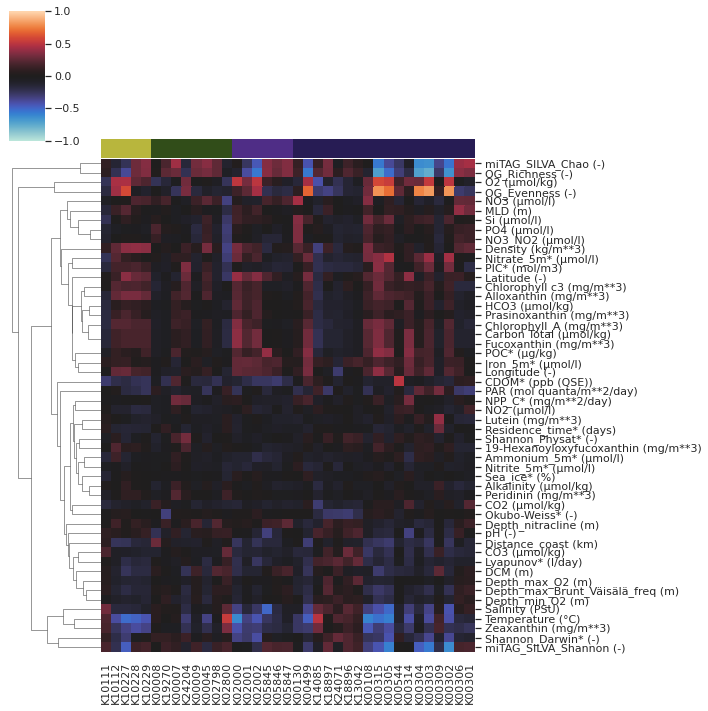

In [258]:
col_cols = envtest.columns.map(all_cdict)
sns.clustermap(test, vmin=-1, vmax=1, cmap=sns.color_palette("icefire", as_cmap=True),
               xticklabels =1, yticklabels=1, col_colors=col_cols, col_cluster=False)
plt.savefig('cluster-env_features.pdf')

<AxesSubplot:>

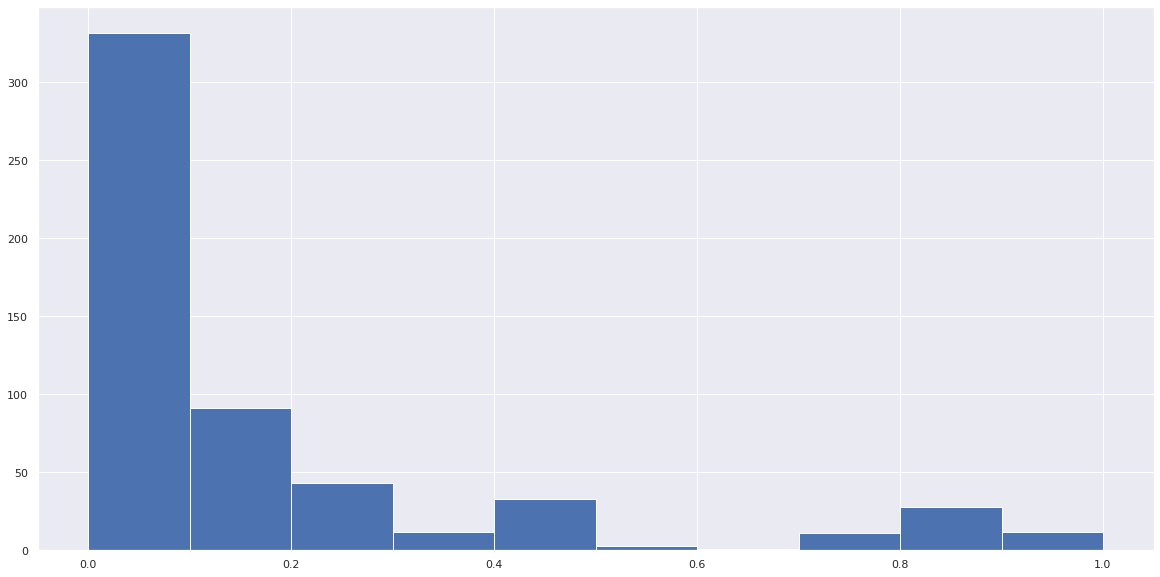

In [337]:
env_params['NO3_NO2 (µmol/l)'].hist(range=[0,1])

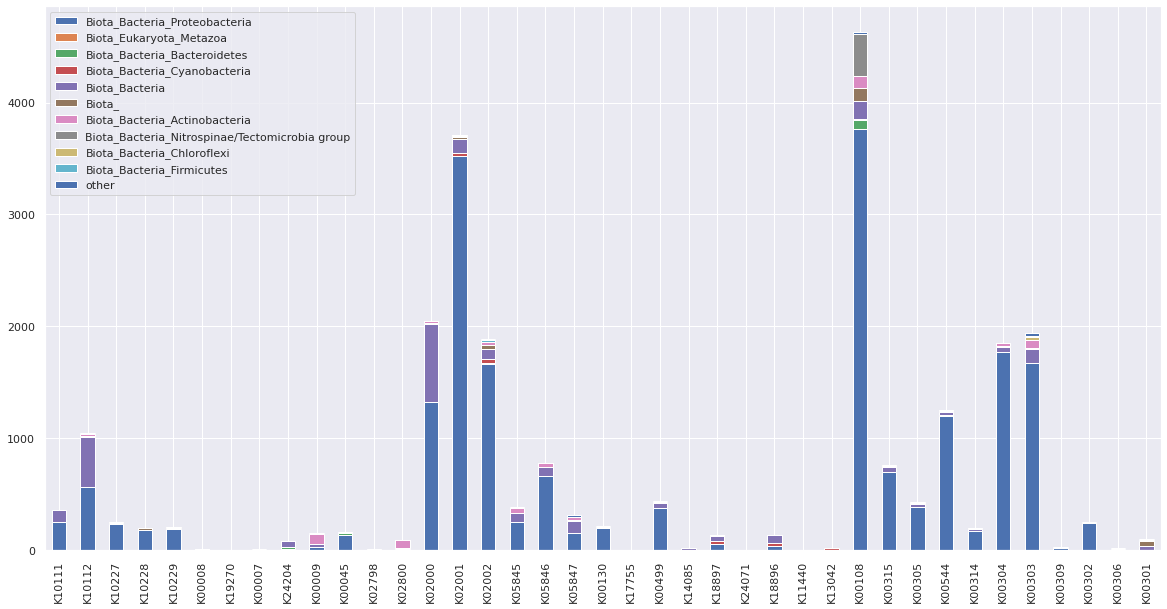

In [462]:
all_groups =[]
for K in all_cdict.keys():
    t = subset_abund[K]['Tbact']
    t['sub_taxa'] = t.taxonomy.str.split('; ').str[0:3].str.join('_')
    groups = t.groupby('sub_taxa').count().index
#     taxonomy.loc[groups, K]=t.groupby('sub_taxa').count()['taxonomy']
    all_groups.append(list(groups))
allgroup_flat = [item for sublist in all_groups for item in sublist]
taxonomy=pd.DataFrame(columns = all_cdict.keys(), index=set(allgroup_flat))
for K in all_cdict.keys():
    t = subset_abund[K]['Tbact']
    t['sub_taxa'] = t.taxonomy.str.split('; ').str[0:3].str.join('_')
    flat_list = [item for sublist in t for item in sublist]
    taxonomy[K] = t.groupby('sub_taxa').count()
taxonomy = taxonomy.fillna(0)
taxonomy2 = taxonomy
to_drop = taxonomy[taxonomy.sum(axis=1)<20].index
taxonomy.loc['other'] = taxonomy.loc[to_drop].sum()
taxonomy = taxonomy.drop(to_drop)
taxonomy.T.plot(kind='bar', stacked=True)
taxonomy_norm = taxonomy/taxonomy.sum()
plt.savefig('TotalTranscripts_recovered_metaT.pdf')

In [463]:
taxonomy.sum()/taxonomy

K10111      K10112  \
Biota_Bacteria_Proteobacteria                   1.405512    1.849291   
Biota_Eukaryota_Metazoa                              inf         inf   
Biota_Bacteria_Bacteroidetes                         inf         inf   
Biota_Bacteria_Cyanobacteria                         inf         inf   
Biota_Bacteria                                  3.466019    2.322940   
Biota_                                               inf  173.833333   
Biota_Bacteria_Actinobacteria                        inf   61.352941   
Biota_Bacteria_Nitrospinae/Tectomicrobia group       inf         inf   
Biota_Bacteria_Chloroflexi                           inf         inf   
Biota_Bacteria_Firmicutes                            inf  347.666667   
other                                                inf  260.750000   

                                                    K10227      K10228  \
Biota_Bacteria_Proteobacteria                     1.094828    1.089385   
Biota_Eukaryota_Metazoa                         254.000000         inf   
Biota_Bacteria_Bacteroidetes                           inf         inf   
Biota_Bacteria_Cyanobacteria                           inf         inf   
Biota_Bacteria                                   50.800000  195.000000   
Biota_                                           16.933333   13.928571   
Biota_Bacteria_Actinobacteria                   254.000000  195.000000   
Biota_Bacteria_Nitrospinae/Tectomicrobia group         inf         inf   
Biota_Bacteria_Chloroflexi                             inf         inf   
Biota_Bacteria_Firmicutes                              inf         inf   
other                                                  inf         inf   

                                                    K10229  K00008  K19270  \
Biota_Bacteria_Proteobacteria                     1.105263     1.6     1.0   
Biota_Eukaryota_Metazoa                                inf     inf     inf   
Biota_Bacteria_Bacteroidetes                           inf     inf     inf   
Biota_Bacteria_Cyanobacteria                           inf     inf     inf   
Biota_Bacteria                                   70.000000     8.0     inf   
Biota_                                           14.000000     8.0     inf   
Biota_Bacteria_Actinobacteria                   105.000000     8.0     inf   
Biota_Bacteria_Nitrospinae/Tectomicrobia group         inf     inf     inf   
Biota_Bacteria_Chloroflexi                             inf     inf     inf   
Biota_Bacteria_Firmicutes                              inf     inf     inf   
other                                                  inf     inf     inf   

                                                K00007     K24204      K00009  \
Biota_Bacteria_Proteobacteria                      1.0   9.444444    5.769231   
Biota_Eukaryota_Metazoa                            inf        inf         inf   
Biota_Bacteria_Bacteroidetes                       inf   4.473684         inf   
Biota_Bacteria_Cyanobacteria                       inf        inf         inf   
Biota_Bacteria                                     inf   1.517857    4.687500   
Biota_                                             inf        inf         inf   
Biota_Bacteria_Actinobacteria                      inf        inf    1.724138   
Biota_Bacteria_Nitrospinae/Tectomicrobia group     inf        inf         inf   
Biota_Bacteria_Chloroflexi                         inf        inf         inf   
Biota_Bacteria_Firmicutes                          inf        inf  150.000000   
other                                              inf  85.000000   37.500000   

                                                ...      K00315      K00305  \
Biota_Bacteria_Proteobacteria                   ...    1.089337    1.122396   
Biota_Eukaryota_Metazoa                         ...         inf  431.000000   
Biota_Bacteria_Bacteroidetes                    ...         inf         inf   
Biota_Bacteria_Cyanobacteria                    ...         inf       

In [464]:
taxonomy[taxonomy.sum(axis=1)>100]

K10111  K10112  K10227  \
Biota_Bacteria_Proteobacteria                    254.0   564.0   232.0   
Biota_Bacteria_Bacteroidetes                       0.0     0.0     0.0   
Biota_Bacteria_Cyanobacteria                       0.0     0.0     0.0   
Biota_Bacteria                                   103.0   449.0     5.0   
Biota_                                             0.0     6.0    15.0   
Biota_Bacteria_Actinobacteria                      0.0    17.0     1.0   
Biota_Bacteria_Nitrospinae/Tectomicrobia group     0.0     0.0     0.0   
other                                              0.0     4.0     0.0   

                                                K10228  K10229  K00008  \
Biota_Bacteria_Proteobacteria                    179.0   190.0     5.0   
Biota_Bacteria_Bacteroidetes                       0.0     0.0     0.0   
Biota_Bacteria_Cyanobacteria                       0.0     0.0     0.0   
Biota_Bacteria                                     1.0     3.0     1.0   
Biota_                                            14.0    15.0     1.0   
Biota_Bacteria_Actinobacteria                      1.0     2.0     1.0   
Biota_Bacteria_Nitrospinae/Tectomicrobia group     0.0     0.0     0.0   
other                                              0.0     0.0     0.0   

                                                K19270  K00007  K24204  \
Biota_Bacteria_Proteobacteria                      1.0     6.0     9.0   
Biota_Bacteria_Bacteroidetes                       0.0     0.0    19.0   
Biota_Bacteria_Cyanobacteria                       0.0     0.0     0.0   
Biota_Bacteria                                     0.0     0.0    56.0   
Biota_                                             0.0     0.0     0.0   
Biota_Bacteria_Actinobacteria                      0.0     0.0     0.0   
Biota_Bacteria_Nitrospinae/Tectomicrobia group     0.0     0.0     0.0   
other                                              0.0     0.0     1.0   

                                                K00009  ...  K00315  K00305  \
Biota_Bacteria_Proteobacteria                     26.0  ...   694.0   384.0   
Biota_Bacteria_Bacteroidetes                       0.0  ...     0.0     0.0   
Biota_Bacteria_Cyanobacteria                       0.0  ...     0.0     0.0   
Biota_Bacteria                                    32.0  ...    44.0    24.0   
Biota_                                             0.0  ...     2.0    13.0   
Biota_Bacteria_Actinobacteria                     87.0  ...    14.0     9.0   
Biota_Bacteria_Nitrospinae/Tectomicrobia group     0.0  ...     0.0     0.0   
other                                              4.0  ...     0.0     0.0   

                                                K00544  K00314  K00304  \
Biota_Bacteria_Proteobacteria                   1199.0   174.0  1772.0   
Biota_Bacteria_Bacteroidetes                       0.0     0.0     0.0   
Biota_Bacteria_Cyanobacteria                       0.0     0.0     0.0   
Biota_Bacteria                                    21.0    11.0    45.0   
Biota_                                             2.0     0.0     7.0   
Biota_Bacteria_Actinobacteria                     10.0    13.0    22.0   
Biota_Bacteria_Nitrospinae/Tectomicrobia group    10.0     0.0     0.0   
other                                              3.0     3.0     1.0   

                                                K00303  K00309  K00302  \
Biota_Bacteria_Proteobacteria                   1675.0    15.0   245.0   
Biota_Bacteria_Bacteroidetes                       0.0     0.0     0.0   
Biota_Bacteria_Cyanobacteria                       0.0     0.0     0.0   
Biota_Bacteria                                   122.0    11.0     0.0   
Biota_                                             9.0     0.0     8.0   
Biota_Bacteria_Actinobacteria                     69.0     0.0     0.0   
Biota_Bacteria_Nitrospinae/Tectomicrobia group     3.0     0.0     0.0   
other                                             29.0     0.0     0.0   

 

In [439]:
passing_set = taxonomy.T.loc[taxonomy.sum(axis=0)>100].T.columns

In [444]:
len(passing_set)

25

<Figure size 864x576 with 0 Axes>

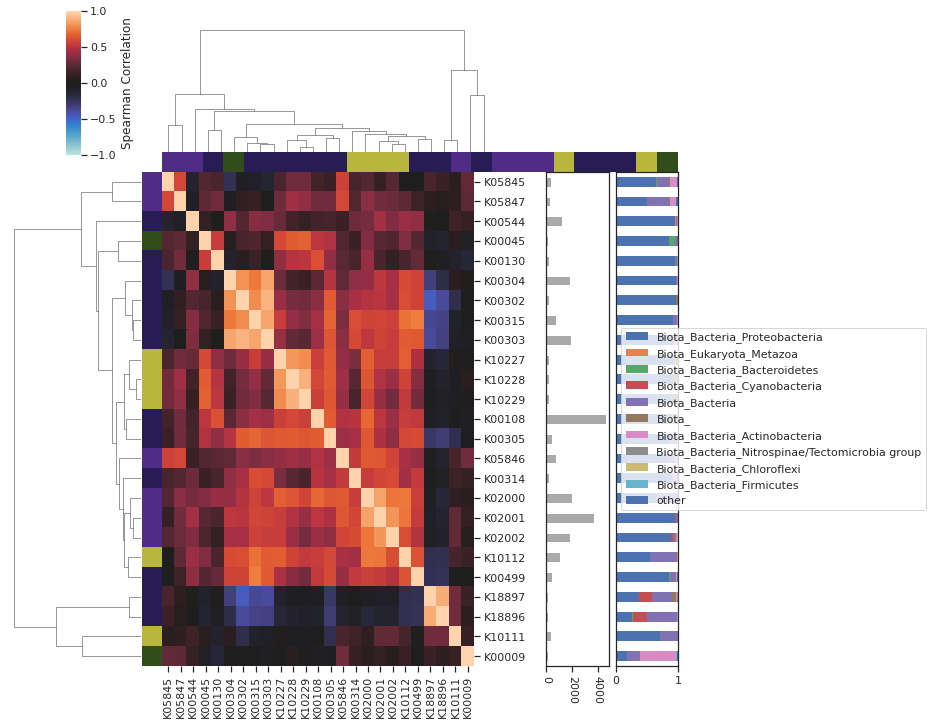

In [500]:
fig = plt.figure(figsize=[12,8])

MGB_combo_corr = MGB_combo.corr('spearman')
MGB_combo_corr = MGB_combo_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')
MGB_combo_corr = MGB_combo_corr.loc[passing_set, passing_set]
row_colors = MGB_combo_corr.index.map(all_cdict)
row_colors

cluster=sns.clustermap(MGB_combo_corr, col_colors=row_colors, row_colors=row_colors,yticklabels=1, metric='braycurtis',
                 vmin=-1, vmax=1, cmap=sns.color_palette("icefire", as_cmap=True),
                  xticklabels =1,)# linewidths=0.1,


cluster.gs.update(right=0.95)
# divide existing axes
divider = make_axes_locatable(cluster.ax_heatmap)
divider2 = make_axes_locatable(cluster.ax_col_dendrogram)
# create new axes for bar plot 
ax = divider.append_axes("right", size="20%", pad=1)
ax2 = divider.append_axes("right", size="20%", pad=0.1)

# create empty space of same size as bar plot axes (don't use this space)
nax = divider2.new_horizontal(size="20%", pad=1.7)

target = [t.get_text() for t in np.array(cluster.ax_heatmap.get_yticklabels())]
ind= np.array([list(MGB_combo_corr.index.values).index(t) for t in target])
# # plot bar plot in ax
taxonomy_norm[target[::-1]].T.plot(kind='barh', ax = ax2, stacked=True,lw=0 )
taxonomy[target[::-1]].sum().plot(kind='barh', ax = ax, color='darkgrey')
ax.set_yticklabels('')
ax2.set_yticklabels('')
ax.set_xticks([0,2000,4000])
ax.set_xticklabels([0,2000,4000], rotation=270)
ax2.set_xlim([0,1])
plt.rcParams['xtick.bottom'] = True
# ax.barh(np.arange(len(target)), taxonomy.values[ind], color='k')
# ax.set_yticklabels([])
# ax.set_ylim(-0.5,len(grouped_MMETSP.index)-.5)
# ax.invert_yaxis()
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('top')
# if genome:
#     ax.set_xlabel('Total Genomes')
# else:
#     ax.set_xlabel('Total Transcriptomes')
# ax.xaxis.set_label_position('top') 
cluster.cax.set_position([0.1, .8, .02, 0.2])
cluster.cax.set_ylabel('Spearman Correlation')




plt.savefig('figures/clustermap.pdf')

()

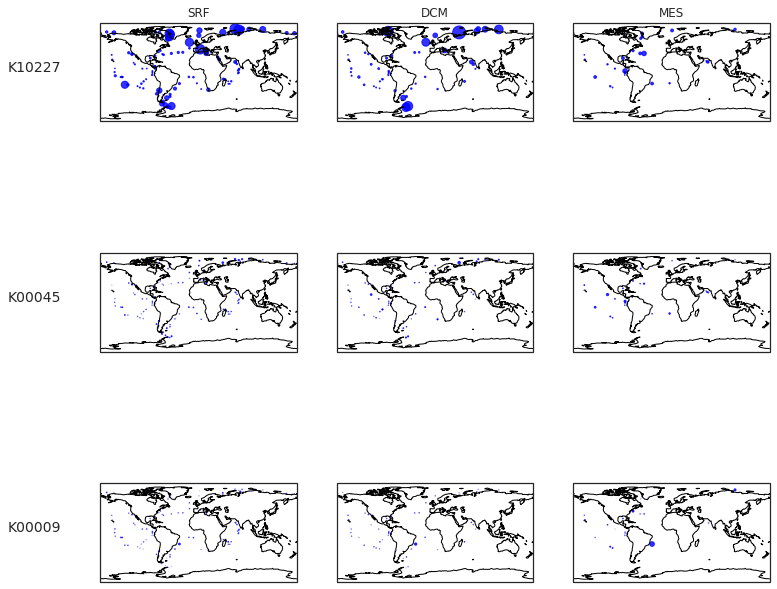

In [528]:
Kplot_maps_subplot(Tbact_summed_env, Klist=['K10227','K00045', 'K00009'], scale=2e5)

()

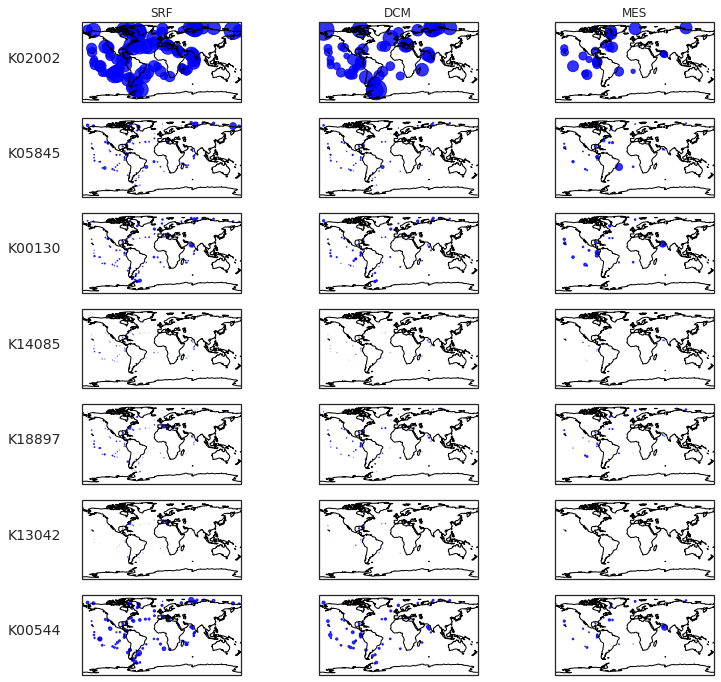

In [533]:
Kplot_maps_subplot(Tbact_summed_env, Klist=['K02002', 'K05845', 'K00130', 'K14085', 'K18897', 'K13042', 'K00544'], scale=2e5)

In [526]:
taxonomy['K13042']

Biota_Bacteria_Proteobacteria                      0.0
Biota_Eukaryota_Metazoa                            0.0
Biota_Bacteria_Bacteroidetes                       0.0
Biota_Bacteria_Cyanobacteria                      14.0
Biota_Bacteria                                     0.0
Biota_                                             0.0
Biota_Bacteria_Actinobacteria                      0.0
Biota_Bacteria_Nitrospinae/Tectomicrobia group     0.0
Biota_Bacteria_Chloroflexi                         0.0
Biota_Bacteria_Firmicutes                          0.0
other                                              0.0
Name: K13042, dtype: float64